In [9]:
import pandas as pd
import numpy as np
import gini

from util_data import DataSet

from sklearn.neighbors import KNeighborsRegressor

# added
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor


data = DataSet()

In [10]:
# I think we can use panda as an alternative for analysis, since it helps us gain more insights into the data

train = data.get_training_set()
test = data.get_testing_set()

In [11]:
ListOfFunction = [LogisticRegression,AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor]

In [12]:
# separate data and label
X = train.drop(['id','target'],axis=1) # drop id and target from X, since "id" wouldn't do much help for prediction
Y = train['target'].as_matrix()

LogisticRegression
Gini: -0.003, Max. Gini: 0.482, Normalized Gini: -0.007


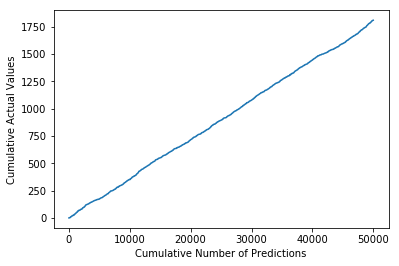

AdaBoostRegressor
Gini: 0.071, Max. Gini: 0.482, Normalized Gini: 0.147


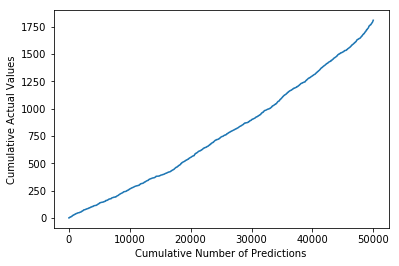

BaggingRegressor
Gini: 0.040, Max. Gini: 0.482, Normalized Gini: 0.083


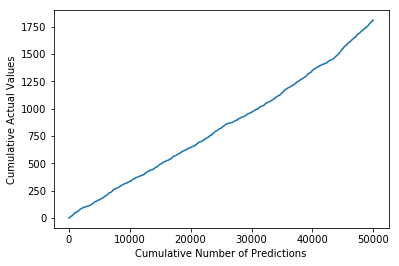

GradientBoostingRegressor
Gini: 0.119, Max. Gini: 0.482, Normalized Gini: 0.247


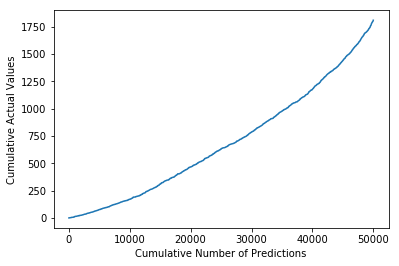

RandomForestRegressor
Gini: 0.046, Max. Gini: 0.482, Normalized Gini: 0.095


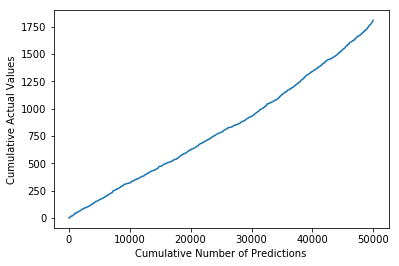

In [13]:
for func in ListOfFunction:
    rfc = func()
    rfc.fit(X[:200000],Y[:200000])
    Y_pred = rfc.predict(X[-50000:])
    print(func.__name__)
    gini.gini_visualization(Y[-50000:],Y_pred,True)